In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
#to countimages with respective to class brain and healthy
ROOT_DIR="/content/drive/MyDrive/Brain Tumor Data Set"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
number_of_images.items()

dict_items([('Healthey', 205), ('Brain Tumor', 205)])

In [5]:
#70% for training
#15% for validation
#15% for testing
#train folder


In [6]:
def dataFolder(p,split):
  if not os.path.exists("./"+p):
   os.mkdir("./"+p)
   for dir in os.listdir(ROOT_DIR):
     os.makedirs("./"+p+"/"+dir)
     for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(split*number_of_images[dir])-5),
                                replace=False):
       O=os.path.join(ROOT_DIR,dir,img)
       D=os.path.join("./"+p,dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{p} folder exists")

In [7]:
dataFolder("train",0.7)

train folder exists


In [8]:
dataFolder("val",0.15)

val folder exists


In [9]:
dataFolder("test",0.15)

test folder exists


In [10]:
#model building
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [11]:
#cnn model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 36)      5220      
                                                                 
 conv2d_2 (Conv2D)           (None, 220, 220, 64)      20800     
                                                                 
 conv2d_3 (Conv2D)           (None, 218, 218, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 109, 109, 128)     0         
                                                        

In [12]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [13]:
#preparing data using a built in function called image data generator
def preprocessingImages1(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/225,horizontal_flip=True)#data augmentation
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [14]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 1069 images belonging to 2 classes.


In [15]:
def preprocessingImages2(path):
  """
  input:path
  output:pree procesed
  """
  image_data=ImageDataGenerator(rescale=1/225)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [16]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 60 images belonging to 2 classes.


In [17]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [18]:
#early stopping and model check point
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')
#model checkpoint
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [19]:
#model training
hs= model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,validation_steps=16,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 8.0978 - accuracy: 0.9453


Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./bestmodel.h5
8/8 [==============================] - 40s 2s/step - loss: 8.0978 - accuracy: 0.9453 - val_loss: 32.8194 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.1969 - accuracy: 0.9805

8/8 [==============================] - 5s 604ms/step - loss: 0.1969 - accuracy: 0.9805
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5974 - accuracy: 0.9831

8/8 [==============================] - 8s 991ms/step - loss: 0.5974 - accuracy: 0.9831
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.3887 - accuracy: 0.9609

8/8 [==============================] - 7s 876ms/step - loss: 0.3887 - accuracy: 0.9609
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.1574 - accuracy: 0.9844

8/8 [==============================] - 5s 580ms/step - loss: 0.1574 - accuracy: 0.9844
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.1242 - accuracy: 0.9844

8/8 [==============================] - 6s 755ms/step - loss: 0.1242 - accuracy: 0.9844
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.2011 - accuracy: 0.9662

8/8 [==============================] - 5s 709ms/step - loss: 0.2011 - accuracy: 0.9662
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.1544 - accuracy: 0.9766

8/8 [==============================] - 5s 645ms/step - loss: 0.1544 - accuracy: 0.9766
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.1178 - accuracy: 0.9766

8/8 [==============================] - 5s 553ms/step - loss: 0.1178 - accuracy: 0.9766
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9844

8/8 [==============================] - 6s 693ms/step - loss: 0.1147 - accuracy: 0.9844
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.0903 - accuracy: 0.9873

8/8 [==============================] - 6s 642ms/step - loss: 0.0903 - accuracy: 0.9873
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9831

8/8 [==============================] - 4s 515ms/step - loss: 0.1125 - accuracy: 0.9831
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9688

8/8 [==============================] - 7s 820ms/step - loss: 0.1256 - accuracy: 0.9688
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 1.0000

8/8 [==============================] - 5s 558ms/step - loss: 0.0454 - accuracy: 1.0000
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9766

8/8 [==============================] - 6s 793ms/step - loss: 0.1387 - accuracy: 0.9766
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.0800 - accuracy: 0.9844

8/8 [==============================] - 5s 554ms/step - loss: 0.0800 - accuracy: 0.9844
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.1173 - accuracy: 0.9727

8/8 [==============================] - 6s 702ms/step - loss: 0.1173 - accuracy: 0.9727
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9844

8/8 [==============================] - 6s 682ms/step - loss: 0.0923 - accuracy: 0.9844
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.1297 - accuracy: 0.9705

8/8 [==============================] - 4s 506ms/step - loss: 0.1297 - accuracy: 0.9705
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9766

8/8 [==============================] - 5s 628ms/step - loss: 0.0923 - accuracy: 0.9766
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.1051 - accuracy: 0.9766

8/8 [==============================] - 6s 743ms/step - loss: 0.1051 - accuracy: 0.9766
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9844

8/8 [==============================] - 5s 552ms/step - loss: 0.0764 - accuracy: 0.9844
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.0613 - accuracy: 0.9844

8/8 [==============================] - 5s 620ms/step - loss: 0.0613 - accuracy: 0.9844
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9831

8/8 [==============================] - 4s 509ms/step - loss: 0.0975 - accuracy: 0.9831
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9883

8/8 [==============================] - 5s 631ms/step - loss: 0.0619 - accuracy: 0.9883
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.0905 - accuracy: 0.9844

8/8 [==============================] - 5s 547ms/step - loss: 0.0905 - accuracy: 0.9844
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9916

8/8 [==============================] - 5s 651ms/step - loss: 0.0510 - accuracy: 0.9916
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.1332 - accuracy: 0.9727

8/8 [==============================] - 6s 762ms/step - loss: 0.1332 - accuracy: 0.9727
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.1029 - accuracy: 0.9766

8/8 [==============================] - 5s 562ms/step - loss: 0.1029 - accuracy: 0.9766
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9727

8/8 [==============================] - 7s 829ms/step - loss: 0.0994 - accuracy: 0.9727


In [20]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

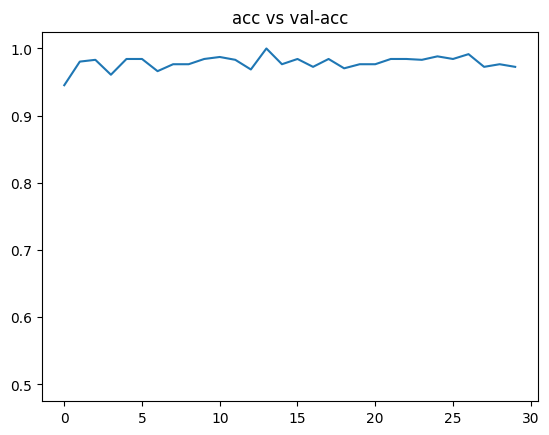

In [23]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs val-acc")
plt.show()

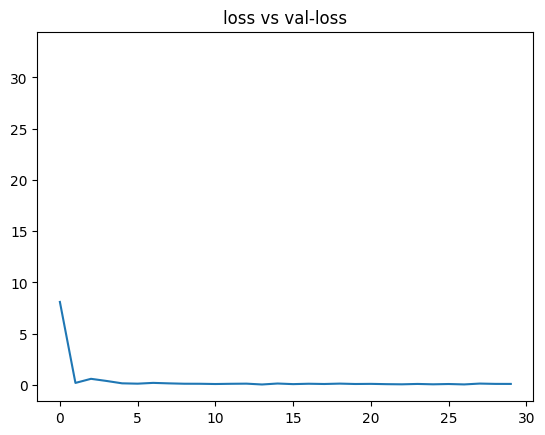

In [22]:
import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs val-loss")
plt.show()

In [26]:
#model accurcy
#model accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [27]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")


the accuracy of our model is 50.0%


In [30]:
from keras.preprocessing.image import load_img,img_to_array

The mri is not having tumor


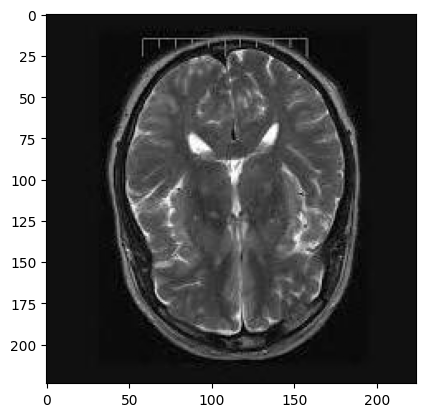

In [33]:
path="/content/drive/MyDrive/Brain Tumor Data Set/Healthey/no10.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=model.predict_generator(input_arr)[0][0]
pred
if pred==0:
  print("The MRI is having a Tumor")
elif pred==1:
  print("The MRI is not having Tumor")
else:
  print("The mri is not having tumor")

In [31]:
train_data.class_indices


{'Brain Tumor': 0, 'Healthey': 1}